In [1]:
import pickle
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from mpl_toolkits.mplot3d import Axes3D
from static_1Dfunction import *
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import
with open("L200/Rains_mode_tot.txt", "rb") as fp:   
    Rains_mode_tot = pickle.load(fp)

with open("L200/P_mode_tot.txt", "rb") as fp:   
    P_mode_tot = pickle.load(fp)

with open("L200/W_mode_tot.txt", "rb") as fp:   
    W_mode_tot = pickle.load(fp)

with open("L200/O_mode_tot.txt", "rb") as fp:   
    O_mode_tot = pickle.load(fp)

with open("L200/Stab_mode_tot.txt", "rb") as fp:   
    Stab_mode_tot = pickle.load(fp)

with open("L200/Lmb_mode_tot.txt", "rb") as fp:   
    Lmb_mode_tot = pickle.load(fp)
    
with open("L200/color_mode.txt", "rb") as fp:   
    color_mode = pickle.load(fp)
    
with open("L200/name_mode.txt", "rb") as fp:   
    name_mode = pickle.load(fp)
    
with open("L200/param.txt", "rb") as fp:   
    param = pickle.load(fp)

N_mode_main=2
N_mode=len(P_mode_tot)

22
22
22
22


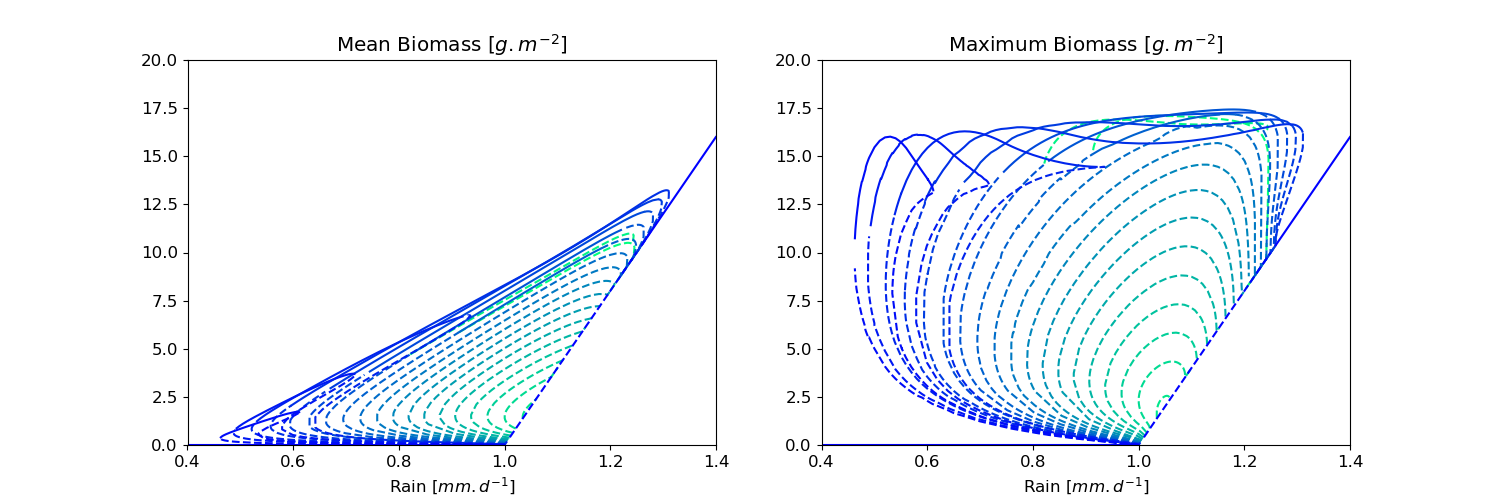

In [3]:
import matplotlib

k=np.linspace(0,N_mode,N_mode)

norm = matplotlib.colors.Normalize(vmin=np.min(k),vmax=np.max(k))
# choose a colormap
c_m = matplotlib.cm.winter
# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)

print(len(Stab_mode_tot))
print(len(Rains_mode_tot))
print(len(color_mode))
print(len(name_mode))
plt.rc('font', size=12) 
Zorder=-np.arange(0,N_mode)
fig,ax=plt.subplots(1,2,figsize=(15,5))
for i in range(N_mode):
    ax[0].plot(np.ma.masked_where(True^Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(True^Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),linestyle='dashed',markersize=1,color=s_m.to_rgba(k[i]),zorder=Zorder[i])
    ax[0].plot(np.ma.masked_where(Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),markersize=4,color=s_m.to_rgba(k[i]),label=name_mode[i],linestyle='solid',zorder=Zorder[i])
    ax[1].plot(np.ma.masked_where(True^Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(True^Stab_mode_tot[i], np.max(P_mode_tot[i],axis=1)),linestyle='dashed',markersize=1,color=s_m.to_rgba(k[i]),zorder=Zorder[i])
    ax[1].plot(np.ma.masked_where(Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(Stab_mode_tot[i], np.max(P_mode_tot[i],axis=1)),markersize=2,color=s_m.to_rgba(k[i]),label=name_mode[i],zorder=Zorder[i])
ax[0].set_xlim(0.4,1.4)
ax[0].set_ylim(0,20)
ax[0].set_title('Mean Biomass $[g.m^{-2}]$')
ax[0].set_xlabel('Rain $[mm.d^{-1}]$')
ax[0].legend()
ax[0].legend(bbox_to_anchor=(-0.4,1.2))
ax[1].set_xlim(0.4,1.4)
ax[1].set_ylim(0,20)
ax[1].set_title('Maximum Biomass $[g.m^{-2}]$')
ax[1].set_xlabel('Rain $[mm.d^{-1}$]')
#ax[1].legend()
plt.savefig('figure/bif_dig_200.png',dpi=500,bbox_inches='tight')

# Start from unstable mode
Essai rain=1.05, 1.15

[70]
200


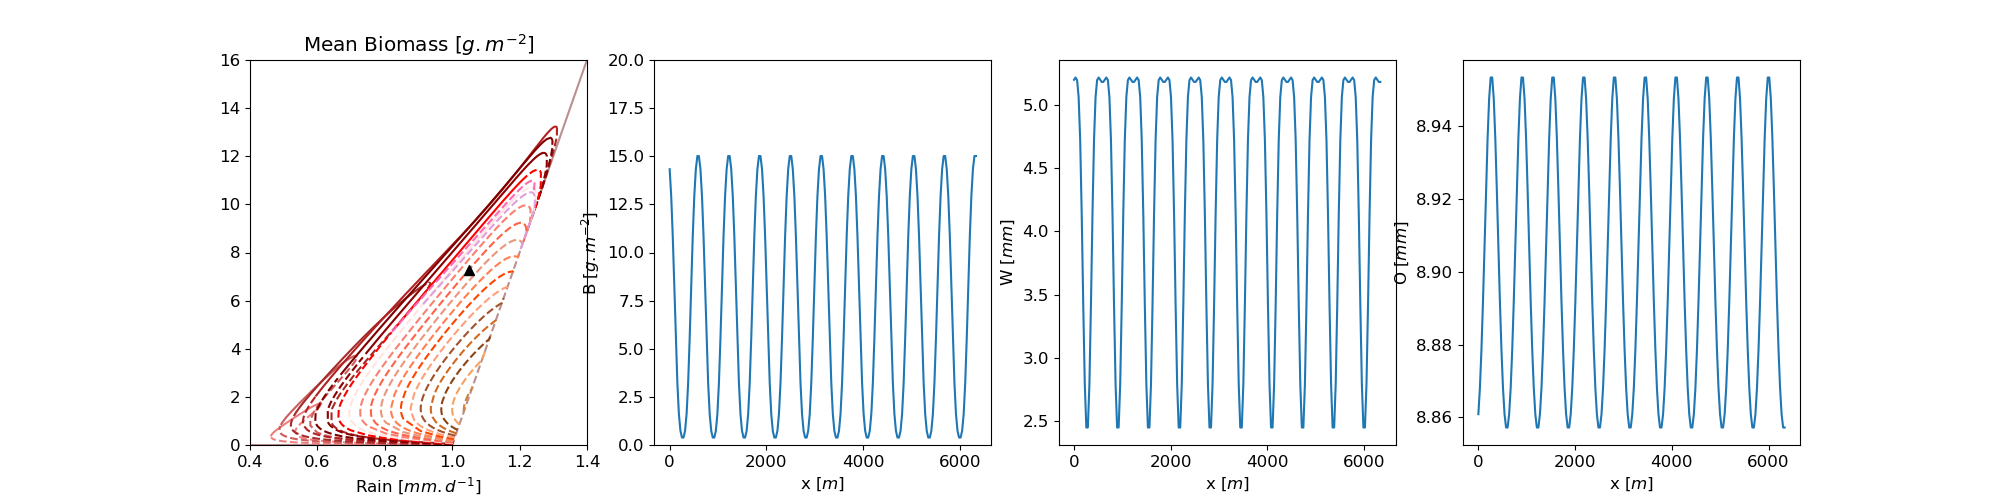

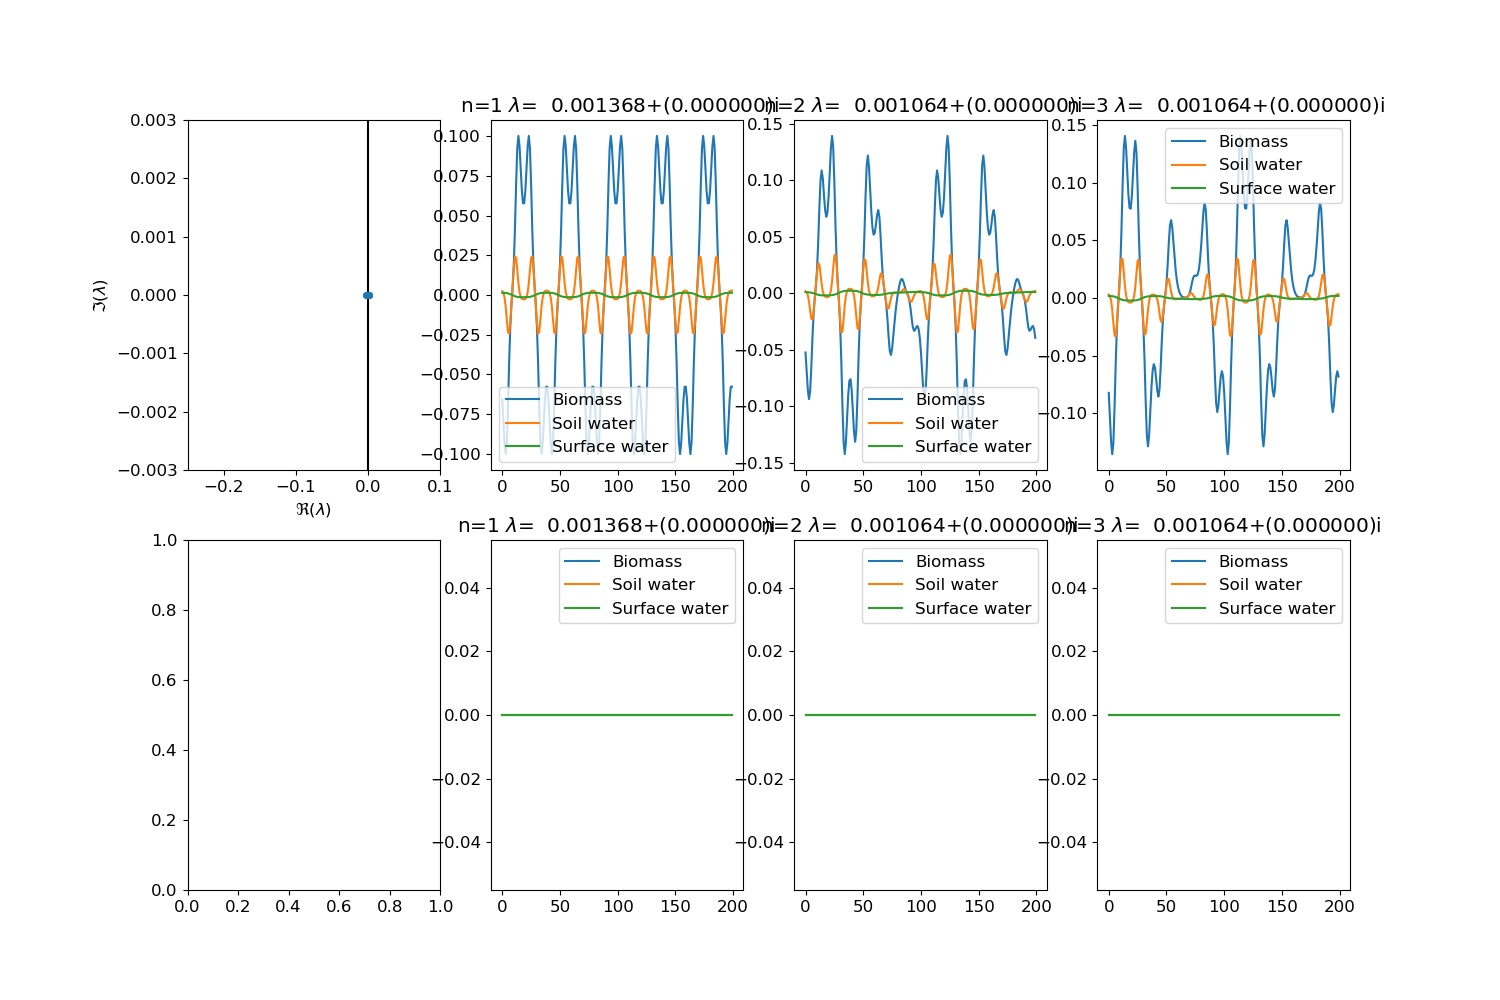

In [4]:
rain=1.05
eps=0.01
n=0
n_mode=10
ind=selec_rain(rain,5,8,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))
print(ind)
#Spatial grid
L=200
N=200
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)*(L/(2*np.pi))

show_equilibria(Rains_mode_tot,P_mode_tot,W_mode_tot,O_mode_tot,Stab_mode_tot,n_mode,ind,x,L,name_mode,color_mode,N_mode)
show_stability_single(Rains_mode_tot[n_mode][ind],P_mode_tot[n_mode][ind,:].T,W_mode_tot[n_mode][ind,:].T,O_mode_tot[n_mode][ind,:].T,param,L)

In [5]:
rain=1.05
eps=0.01
n=0
n_mode=10
ind=selec_rain(rain,5,12,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
print(ind)
#Spatial grid
L=200
N=200
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Temporal grid
tmax=15000
M=tmax*100+1
dt=tmax/(M-1)
Dt=10
t=np.linspace(0,tmax,M)
#precipitation
R=Rains_mode_tot[n_mode][ind]
rain=R
Rf=R
prec=(R-Rf)*(1/(1+np.exp(0.001*(t-3000))))+Rf
#prec=R*np.ones(M)
#initial condition
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind],W_mode_tot[n_mode][ind],O_mode_tot[n_mode][ind],Rains_mode_tot[n_mode][ind],L,param)
P0=P_mode_tot[n_mode][ind]*1+eps*np.real(vec[:N,n])
W0=W_mode_tot[n_mode][ind]*1+eps*np.real(vec[N:2*N,n])
O0=O_mode_tot[n_mode][ind]*1+eps*np.real(vec[2*N:,n])
Sol=[]
n_run=1
for i in range(n_run):
    P_full,W_full,O_full,R_full,t=VegModelII_Riet_Spec_1D_02pi(L,N,M,tmax,dt,Dt,prec,P0+0*np.random.rand(N),W0+0*np.random.rand(N),O0+0*np.random.rand(N),param)
    Sol.append([P_full,W_full,O_full,R_full,t])
  

70
200


[]
[]


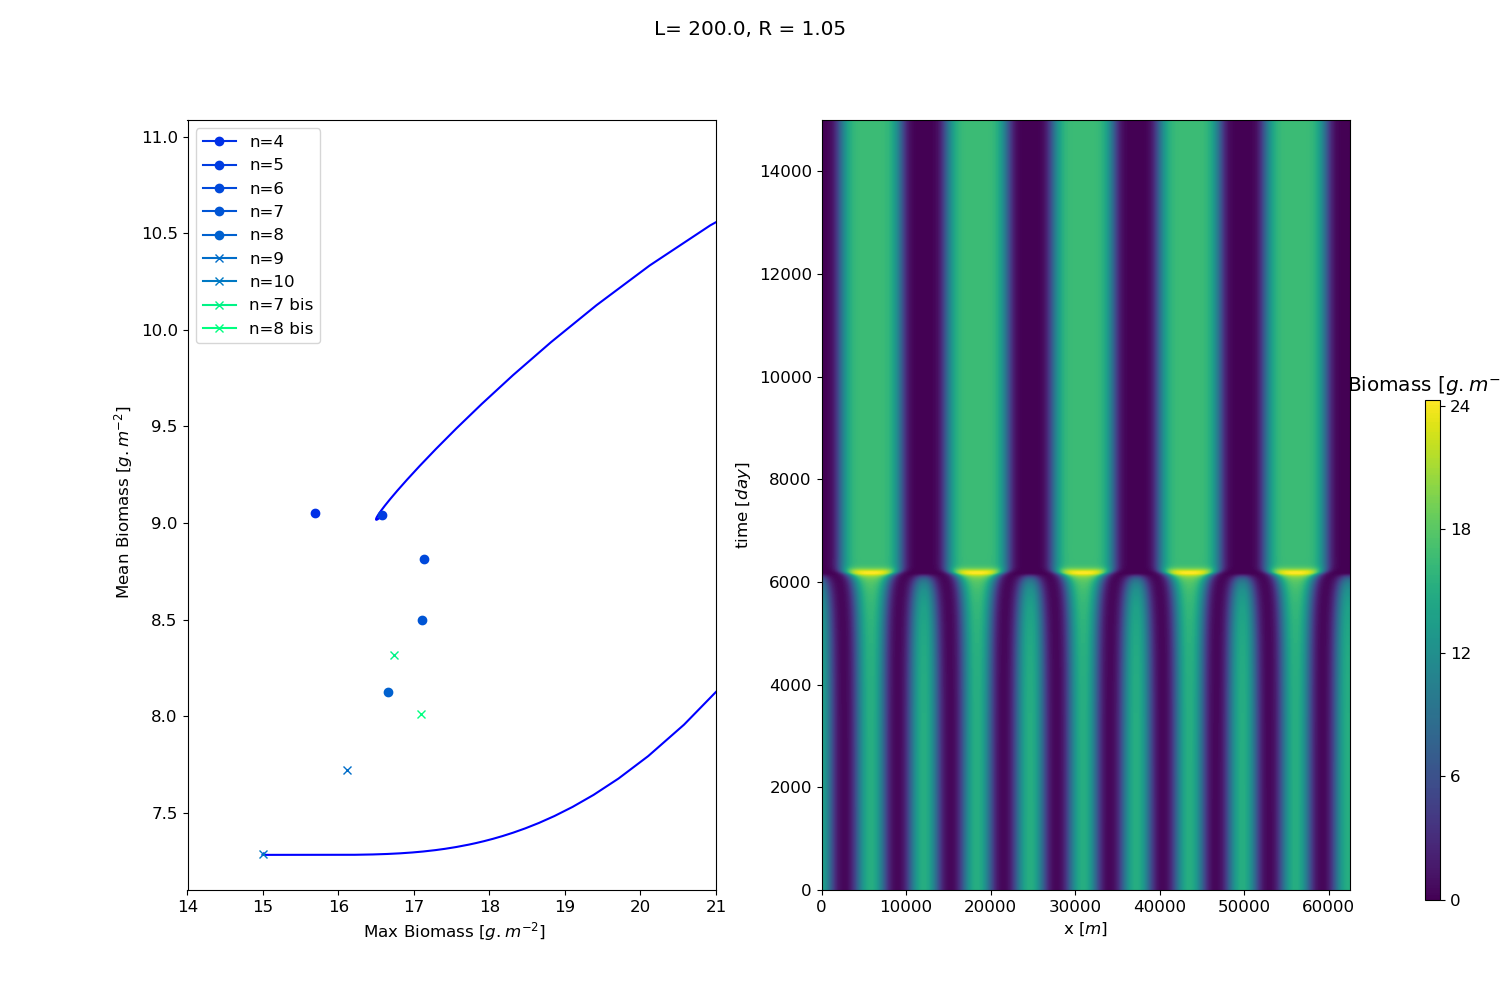

In [6]:
import matplotlib
k=np.linspace(0,N_mode,N_mode)

norm = matplotlib.colors.Normalize(vmin=np.min(k),vmax=np.max(k))
# choose a colormap
c_m = matplotlib.cm.winter
# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)

x=np.arange(0,2*np.pi,dx)*(L/2*np.pi)

fig=plt.figure(figsize=(15,10))
fig.suptitle('L= %.1f, R = %.2f'%(L,rain))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

xx,tt=np.meshgrid(x*(L/(2*np.pi)),t)
for i in range(n_run):
    ax1.plot(np.max(Sol[i][0],axis=1),np.mean(Sol[i][0],axis=1),color=s_m.to_rgba(k[i]))
    ax2.plot(np.max(Sol[i][0],axis=1),np.mean(Sol[i][0],axis=1),color=s_m.to_rgba(k[i]))
    c=np.linspace(-.001,np.max(np.max(Sol[0][0])),201)
    contB=ax2.contourf(xx,tt,Sol[i][0],c)
    cax = plt.axes([0.95, 0.1,0.01,0.5])    
    ticks_cbar=np.linspace(0,int(np.max(Sol[0][0])),5)
    cbar=plt.colorbar(contB,cax=cax,orientation='vertical',ticks=ticks_cbar)
    cbar.ax.set_title('Biomass $[g.m^{-2}]$')
    ax2.set_xlabel('x $[m]$')
    ax2.set_ylabel('time $[day]$')

ax1.set_xlabel(' Max Biomass $[g.m^{-2}]$')
ax1.set_ylabel(' Mean Biomass $[g.m^{-2}]$')
ax1.set_xlim((14,21))

j=0
Equi=[]
Equi2=[]
for n_mode in [4,5,6,7,8,9,10,-2,-1]:
    ind=selec_rain(rain,5,12,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
    #interpolate to rain
    #print(n_mode)
    rain_inter=np.squeeze([Rains_mode_tot[n_mode][ind-1],Rains_mode_tot[n_mode][ind+1]])
    max_inter=np.squeeze([np.max(P_mode_tot[n_mode][ind-1]),np.max(P_mode_tot[n_mode][ind+1])])
    mean_inter=np.squeeze([np.mean(P_mode_tot[n_mode][ind-1]),np.mean(P_mode_tot[n_mode][ind+1])])
    #print(rain_inter)
    #print(max_inter)
    #print(mean_inter)
    equi_max=np.interp(rain,rain_inter,max_inter)
    equi_mean=np.interp(rain,rain_inter,mean_inter)
    #print(equi_max)
    #print(equi_mean)
    if Stab_mode_tot[n_mode][ind]==True:
        mark='x'
    else:
        mark='o'
    ax1.plot(equi_max,equi_mean,color=s_m.to_rgba(k[n_mode]),marker=mark,label=name_mode[n_mode])
    j=j+1
print(np.squeeze(Equi))
print(np.squeeze(Equi2))
ax1.legend()

plt.savefig('figure/Unstable_200.png',dpi=300,bbox_inches='tight')

# Start from unstable mode
Essai rain=1.05, 1.15

[77]
200


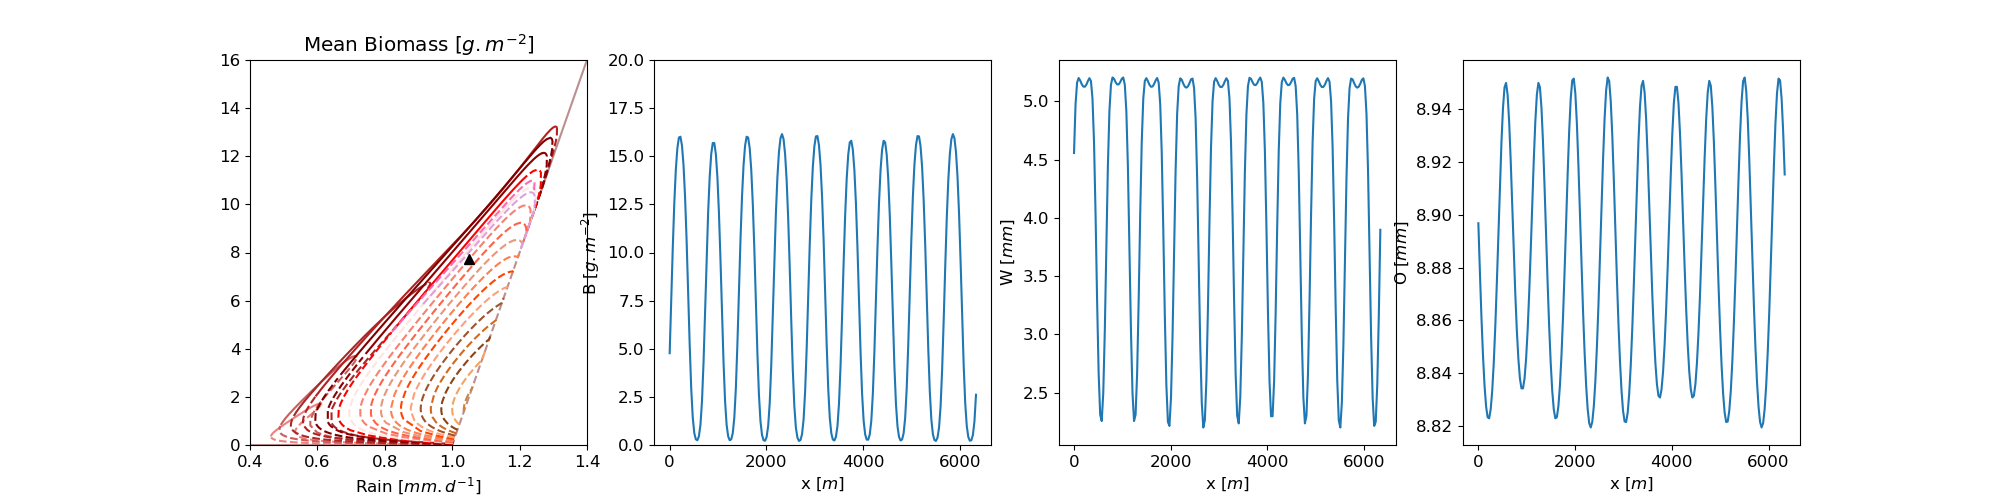

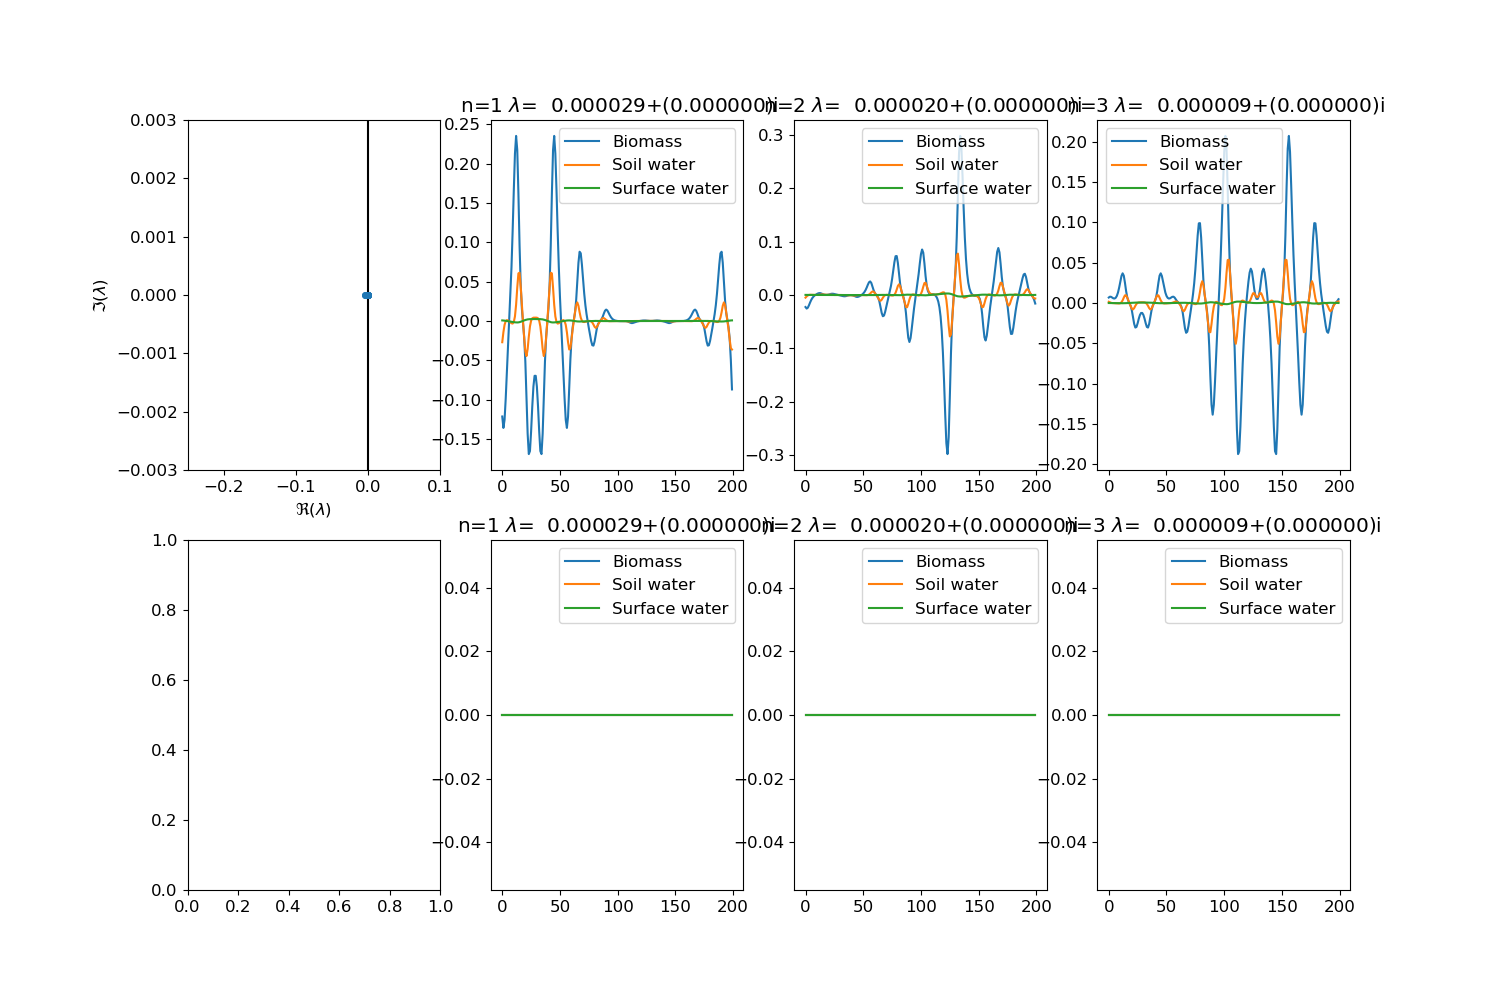

In [7]:
rain=1.05
eps=0.01
n=0
n_mode=9
ind=selec_rain(rain,5,8,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))
print(ind)
#Spatial grid
L=200
N=200
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)*(L/(2*np.pi))

show_equilibria(Rains_mode_tot,P_mode_tot,W_mode_tot,O_mode_tot,Stab_mode_tot,n_mode,ind,x,L,name_mode,color_mode,N_mode)
show_stability_single(Rains_mode_tot[n_mode][ind],P_mode_tot[n_mode][ind,:].T,W_mode_tot[n_mode][ind,:].T,O_mode_tot[n_mode][ind,:].T,param,L)

In [8]:
rain=1.05
eps=0.01
n=0

ind=selec_rain(rain,5,12,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
print(ind)
#Spatial grid
L=200
N=200
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Temporal grid
tmax=150000
M=tmax*100+1
dt=tmax/(M-1)
Dt=10
t=np.linspace(0,tmax,M)
#precipitation
R=Rains_mode_tot[n_mode][ind]
rain=R
Rf=R
prec=(R-Rf)*(1/(1+np.exp(0.001*(t-3000))))+Rf
#prec=R*np.ones(M)
#initial condition
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind],W_mode_tot[n_mode][ind],O_mode_tot[n_mode][ind],Rains_mode_tot[n_mode][ind],L,param)
P0=P_mode_tot[n_mode][ind]*1+eps*np.real(vec[:N,n])
W0=W_mode_tot[n_mode][ind]*1+eps*np.real(vec[N:2*N,n])
O0=O_mode_tot[n_mode][ind]*1+eps*np.real(vec[2*N:,n])
Sol=[]
n_run=1
for i in range(n_run):
    P_full,W_full,O_full,R_full,t=VegModelII_Riet_Spec_1D_02pi(L,N,M,tmax,dt,Dt,prec,P0+0*np.random.rand(N),W0+0*np.random.rand(N),O0+0*np.random.rand(N),param)
    Sol.append([P_full,W_full,O_full,R_full,t])
  

77
200


[]
[]


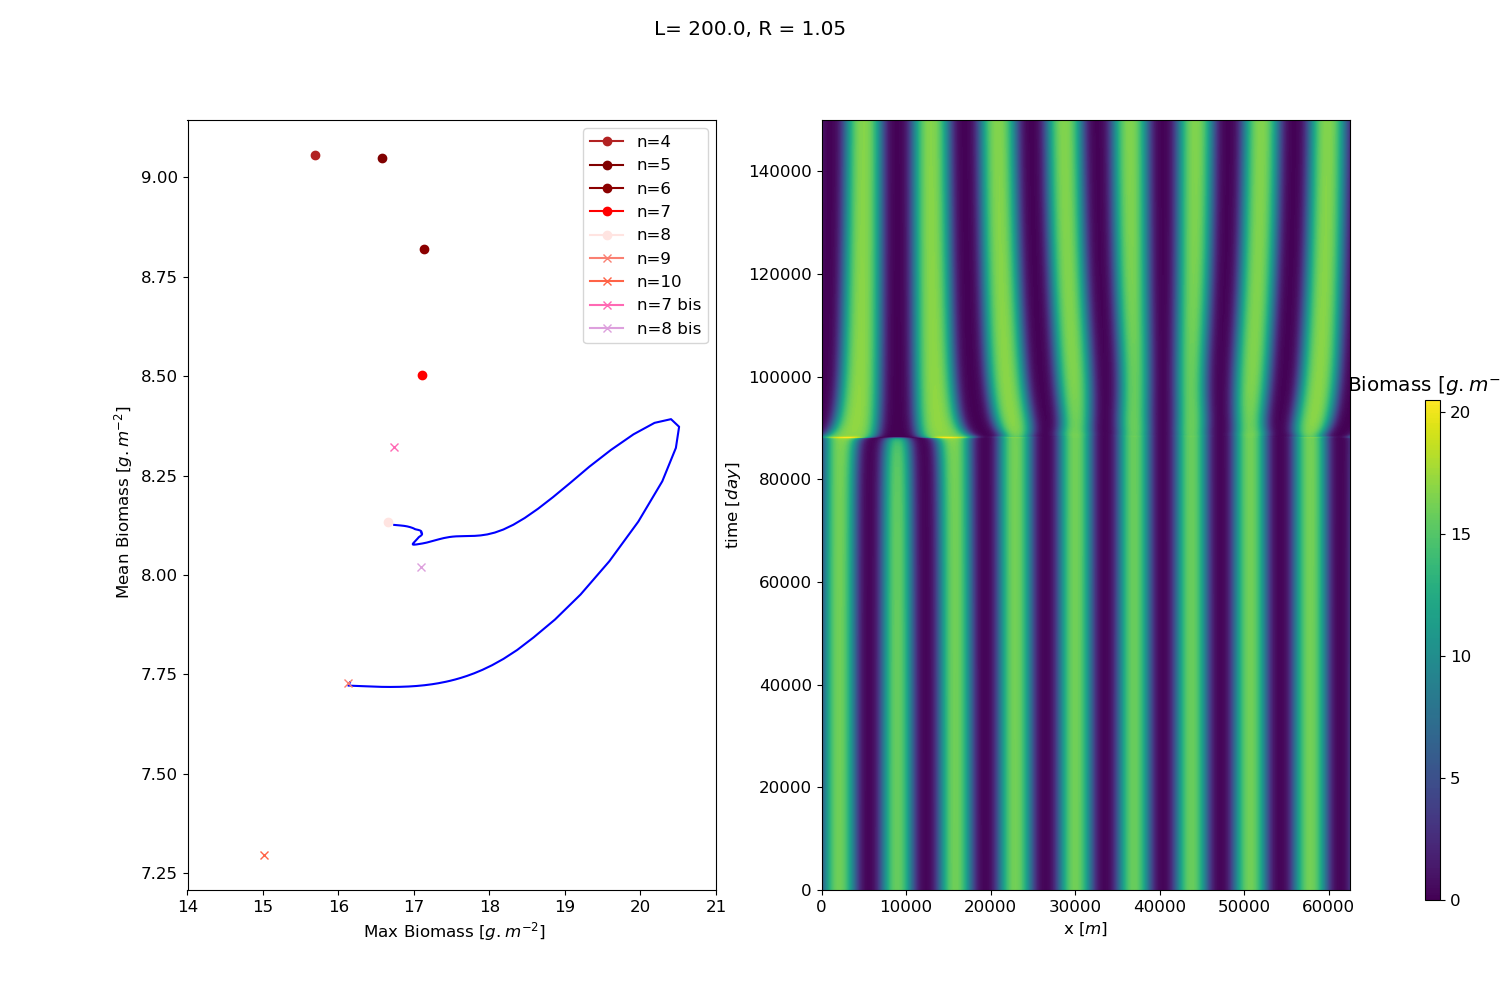

In [9]:
import matplotlib
k=np.linspace(0,N_mode,N_mode)

norm = matplotlib.colors.Normalize(vmin=np.min(k),vmax=np.max(k))
# choose a colormap
c_m = matplotlib.cm.winter
# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)

x=np.arange(0,2*np.pi,dx)*(L/2*np.pi)

fig=plt.figure(figsize=(15,10))
fig.suptitle('L= %.1f, R = %.2f'%(L,rain))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

xx,tt=np.meshgrid(x*(L/(2*np.pi)),t)
for i in range(n_run):
    ax1.plot(np.max(Sol[i][0],axis=1),np.mean(Sol[i][0],axis=1),color=s_m.to_rgba(k[i]))
    ax2.plot(np.max(Sol[i][0],axis=1),np.mean(Sol[i][0],axis=1),color=s_m.to_rgba(k[i]))
    c=np.linspace(-.001,np.max(np.max(Sol[0][0])),201)
    contB=ax2.contourf(xx,tt,Sol[i][0],c)
    cax = plt.axes([0.95, 0.1,0.01,0.5])    
    ticks_cbar=np.linspace(0,int(np.max(Sol[0][0])),5)
    cbar=plt.colorbar(contB,cax=cax,orientation='vertical',ticks=ticks_cbar)
    cbar.ax.set_title('Biomass $[g.m^{-2}]$')
    ax2.set_xlabel('x $[m]$')
    ax2.set_ylabel('time $[day]$')

ax1.set_xlabel(' Max Biomass $[g.m^{-2}]$')
ax1.set_ylabel(' Mean Biomass $[g.m^{-2}]$')
ax1.set_xlim((14,21))

j=0
Equi=[]
Equi2=[]
for n_mode in [4,5,6,7,8,9,10,-2,-1]:
    ind=selec_rain(rain,5,12,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
    #interpolate to rain
    #print(n_mode)
    rain_inter=np.squeeze([Rains_mode_tot[n_mode][ind-1],Rains_mode_tot[n_mode][ind+1]])
    max_inter=np.squeeze([np.max(P_mode_tot[n_mode][ind-1]),np.max(P_mode_tot[n_mode][ind+1])])
    mean_inter=np.squeeze([np.mean(P_mode_tot[n_mode][ind-1]),np.mean(P_mode_tot[n_mode][ind+1])])
    #print(rain_inter)
    #print(max_inter)
    #print(mean_inter)
    equi_max=np.interp(rain,rain_inter,max_inter)
    equi_mean=np.interp(rain,rain_inter,mean_inter)
    #print(equi_max)
    #print(equi_mean)
    if Stab_mode_tot[n_mode][ind]==True:
        mark='x'
    else:
        mark='o'
    ax1.plot(equi_max,equi_mean,color=color_mode[n_mode],marker=mark,label=name_mode[n_mode])
    j=j+1
print(np.squeeze(Equi))
print(np.squeeze(Equi2))
ax1.legend()

plt.savefig('figure/Unstable_200_2.png',dpi=300,bbox_inches='tight')

# Start from unstable mode
Essai rain=1.05, 1.15

[57]
200


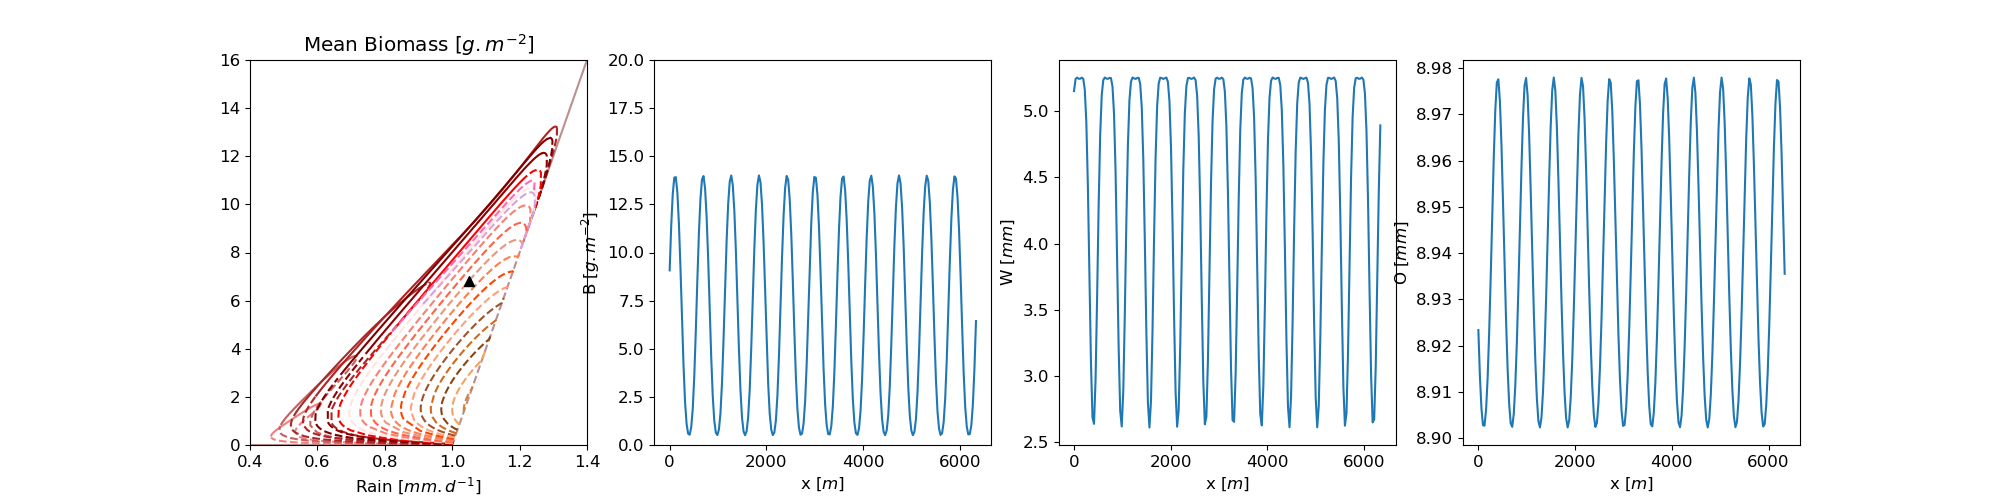

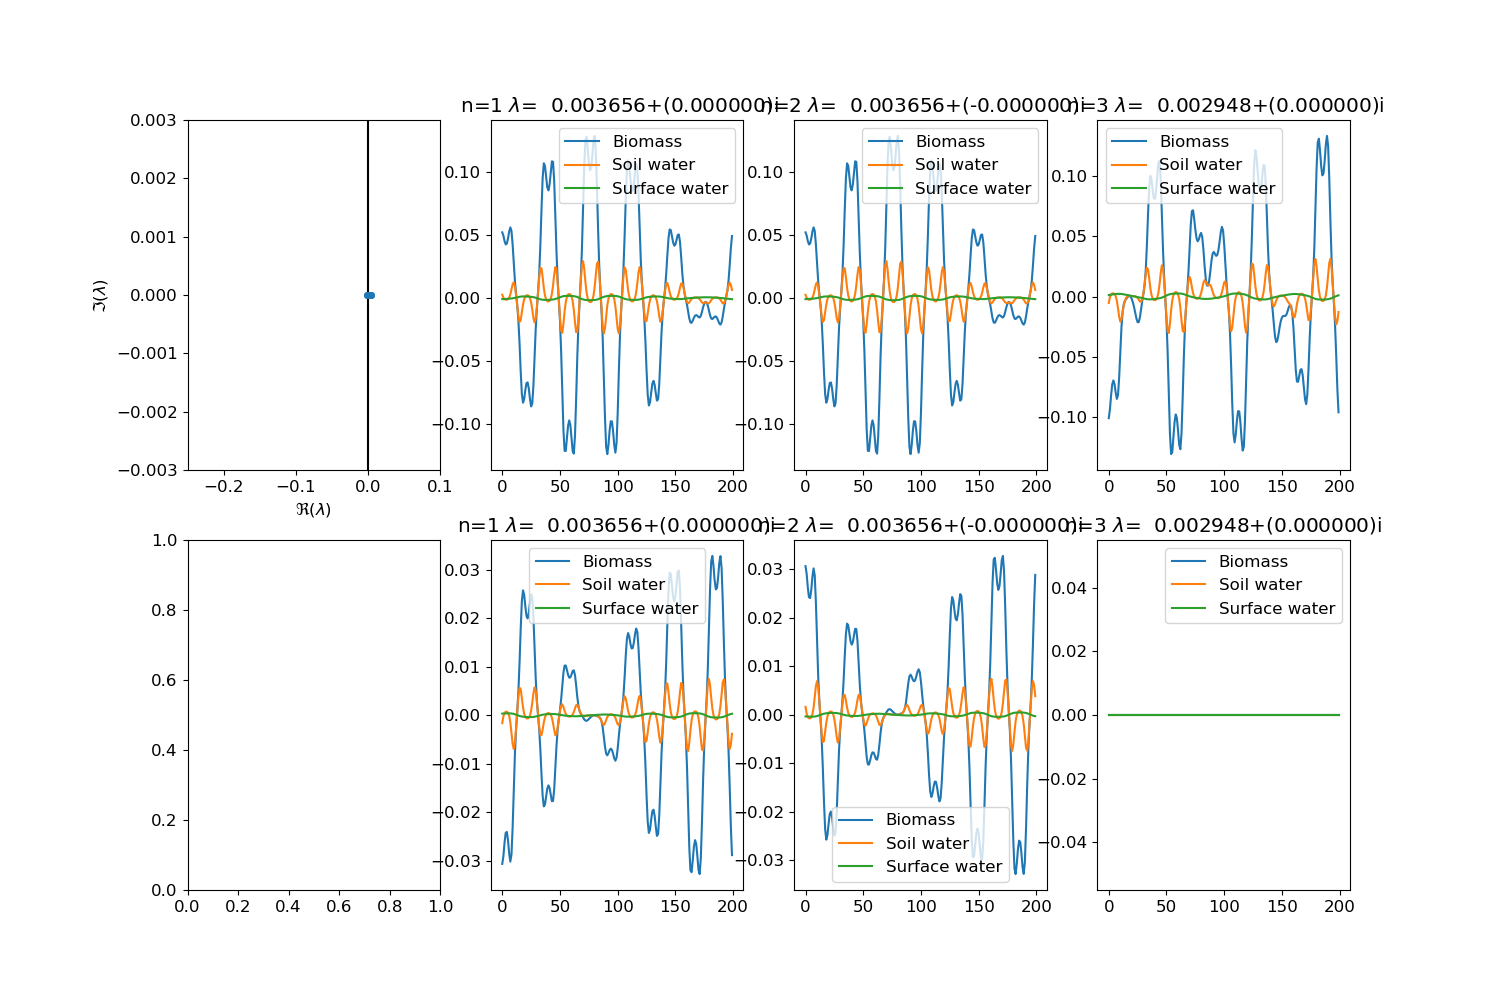

In [10]:
rain=1.05
eps=0.01
n=0
n_mode=11
ind=selec_rain(rain,5,8,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))
print(ind)
#Spatial grid
L=200
N=200
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)*(L/(2*np.pi))

show_equilibria(Rains_mode_tot,P_mode_tot,W_mode_tot,O_mode_tot,Stab_mode_tot,n_mode,ind,x,L,name_mode,color_mode,N_mode)
show_stability_single(Rains_mode_tot[n_mode][ind],P_mode_tot[n_mode][ind,:].T,W_mode_tot[n_mode][ind,:].T,O_mode_tot[n_mode][ind,:].T,param,L)

In [11]:
rain=1.05
eps=0.01
n=0

ind=selec_rain(rain,5,12,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
print(ind)
#Spatial grid
L=200
N=200
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Temporal grid
tmax=10000
M=tmax*100+1
dt=tmax/(M-1)
Dt=10
t=np.linspace(0,tmax,M)
#precipitation
R=Rains_mode_tot[n_mode][ind]
rain=R
Rf=R
prec=(R-Rf)*(1/(1+np.exp(0.001*(t-3000))))+Rf
#prec=R*np.ones(M)
#initial condition
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind],W_mode_tot[n_mode][ind],O_mode_tot[n_mode][ind],Rains_mode_tot[n_mode][ind],L,param)
P0=P_mode_tot[n_mode][ind]*1+eps*np.real(vec[:N,n])
W0=W_mode_tot[n_mode][ind]*1+eps*np.real(vec[N:2*N,n])
O0=O_mode_tot[n_mode][ind]*1+eps*np.real(vec[2*N:,n])
Sol=[]
n_run=1
for i in range(n_run):
    P_full,W_full,O_full,R_full,t=VegModelII_Riet_Spec_1D_02pi(L,N,M,tmax,dt,Dt,prec,P0+0*np.random.rand(N),W0+0*np.random.rand(N),O0+0*np.random.rand(N),param)
    Sol.append([P_full,W_full,O_full,R_full,t])
  

57
200


[]
[]


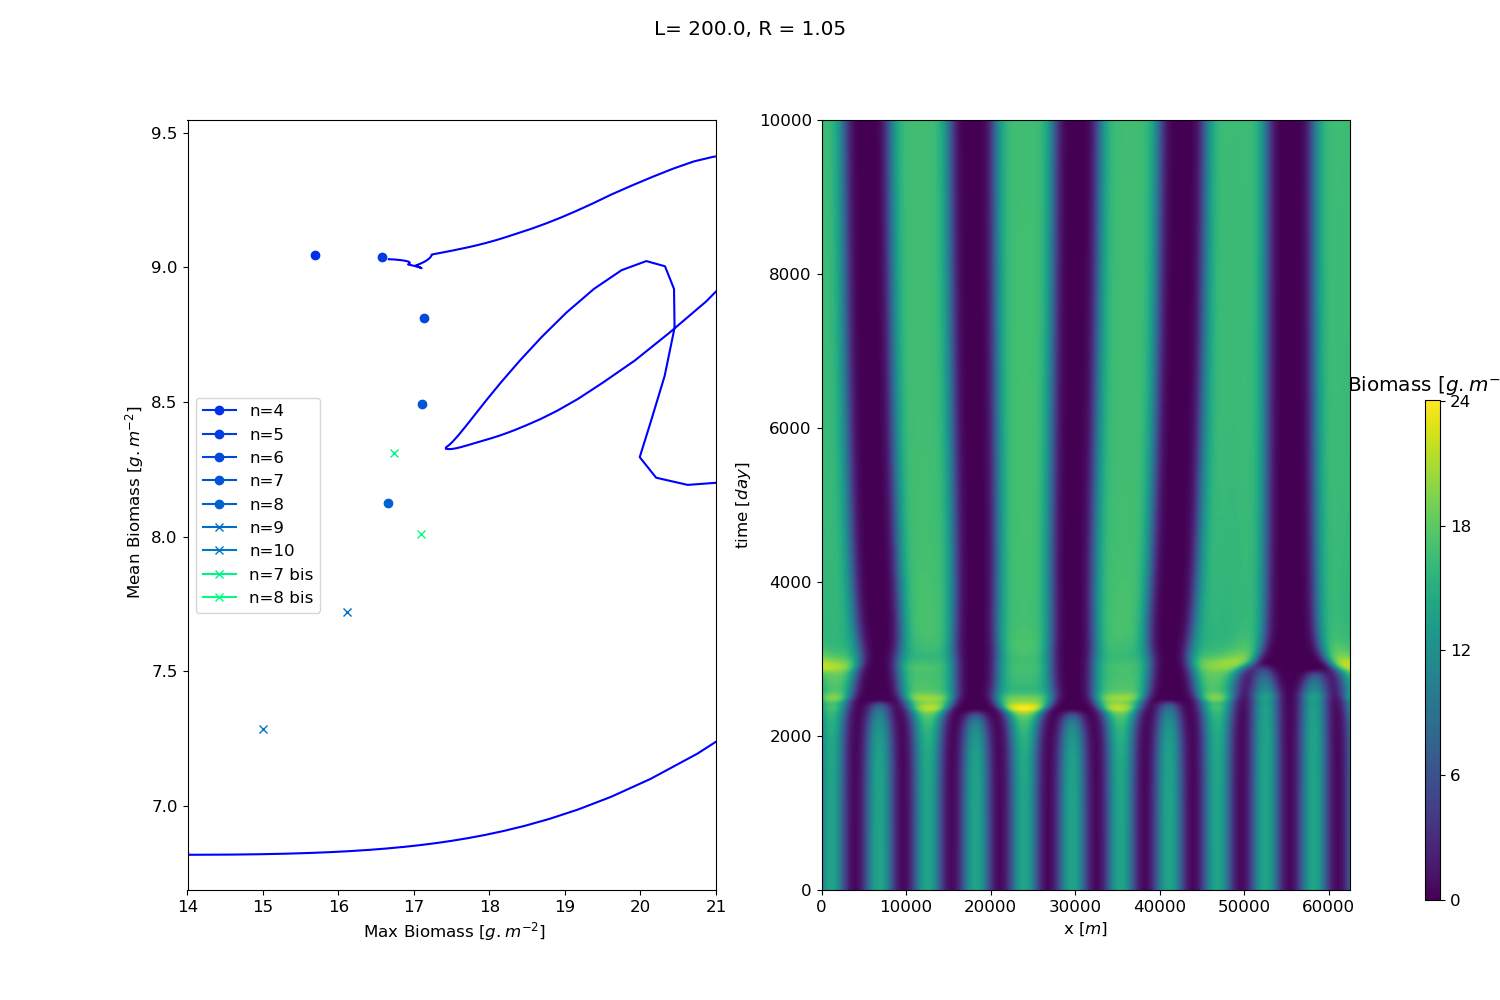

In [12]:
import matplotlib
k=np.linspace(0,N_mode,N_mode)

norm = matplotlib.colors.Normalize(vmin=np.min(k),vmax=np.max(k))
# choose a colormap
c_m = matplotlib.cm.winter
# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)

x=np.arange(0,2*np.pi,dx)*(L/2*np.pi)

fig=plt.figure(figsize=(15,10))
fig.suptitle('L= %.1f, R = %.2f'%(L,rain))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

xx,tt=np.meshgrid(x*(L/(2*np.pi)),t)
for i in range(n_run):
    ax1.plot(np.max(Sol[i][0],axis=1),np.mean(Sol[i][0],axis=1),color=s_m.to_rgba(k[i]))
    ax2.plot(np.max(Sol[i][0],axis=1),np.mean(Sol[i][0],axis=1),color=s_m.to_rgba(k[i]))
    c=np.linspace(-.001,np.max(np.max(Sol[0][0])),201)
    contB=ax2.contourf(xx,tt,Sol[i][0],c)
    cax = plt.axes([0.95, 0.1,0.01,0.5])    
    ticks_cbar=np.linspace(0,int(np.max(Sol[0][0])),5)
    cbar=plt.colorbar(contB,cax=cax,orientation='vertical',ticks=ticks_cbar)
    cbar.ax.set_title('Biomass $[g.m^{-2}]$')
    ax2.set_xlabel('x $[m]$')
    ax2.set_ylabel('time $[day]$')

ax1.set_xlabel(' Max Biomass $[g.m^{-2}]$')
ax1.set_ylabel(' Mean Biomass $[g.m^{-2}]$')
ax1.set_xlim((14,21))

j=0
Equi=[]
Equi2=[]
for n_mode in [4,5,6,7,8,9,10,-2,-1]:
    ind=selec_rain(rain,5,12,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))[0]
    #interpolate to rain
    #print(n_mode)
    rain_inter=np.squeeze([Rains_mode_tot[n_mode][ind-1],Rains_mode_tot[n_mode][ind+1]])
    max_inter=np.squeeze([np.max(P_mode_tot[n_mode][ind-1]),np.max(P_mode_tot[n_mode][ind+1])])
    mean_inter=np.squeeze([np.mean(P_mode_tot[n_mode][ind-1]),np.mean(P_mode_tot[n_mode][ind+1])])
    #print(rain_inter)
    #print(max_inter)
    #print(mean_inter)
    equi_max=np.interp(rain,rain_inter,max_inter)
    equi_mean=np.interp(rain,rain_inter,mean_inter)
    #print(equi_max)
    #print(equi_mean)
    if Stab_mode_tot[n_mode][ind]==True:
        mark='x'
    else:
        mark='o'
    ax1.plot(equi_max,equi_mean,color=s_m.to_rgba(k[n_mode]),marker=mark,label=name_mode[n_mode])
    j=j+1
print(np.squeeze(Equi))
print(np.squeeze(Equi2))
ax1.legend()

plt.savefig('figure/Unstable_200_3.png',dpi=300,bbox_inches='tight')